<a href="https://colab.research.google.com/github/novay/python/blob/main/classification/lightgbm_classifier_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LightGBM (Example)**<br/>

Di notebook ini saya akan coba membuat poin-poin penting dalam melakukan proses klasifikasi menggunakan **Algoritma LightGBM**. 

#### **1. Initial Set-Up**<br/>
Pada tahap ini saya mengumpulkan semua library yang akan digunakan dalam 1 cell berikut ini:

In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### **2. Data Preparation**<br/>
Sebelum mulai, pastikan sudah menyiapkan data yang ingin diolah.

##### **2.1 Read Dataset**<br/>


In [92]:
df = pd.read_csv("/content/contoh.csv", encoding = 'utf-8')

df.isnull().values.any() # mengecek apakah ada data yang berisi null
len(df[pd.isnull(df).any(axis=1)]) # mengecek jumlah baris data yang berisi null
df = df.dropna(how='all') # menghapus baris null dan recheck kembali
len(df[pd.isnull(df).any(axis=1)])

map = {"m" : 1, "f" : 0} # Mapping gender
df["gender"] = df["gender"].map(map)

df.sample(5)

,name,gender
96601,artanabil khaleef romansyah,1
304961,lukas pardamean silalahi,1
513689,sainab,0
73509,andika novian,1
421560,nicholas sie,1


In [93]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624241 entries, 0 to 624240
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    624241 non-null  object
 1   gender  624241 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


- Seperti yang dilihat ada 2 kolom dalam database diatas dan tidak ada yang bernilai kosong, null atau NaN.

##### **2.2 Distribusi Variabel Target**<br/>
Dimana, variable targetnya adalah `gender`

In [71]:
df['gender'].value_counts()

1    322538
0    301703
Name: gender, dtype: int64

- Variabel target adalah `gender`. Berisi 2 nilai - 0 dan 1.
- 0 untuk **Perempuan** dan 1 untuk **Laki-Laki**.
- Dari sini kita akan memperlakukannya sebagai klasifikasi biner.

##### **2.3 Penentuan Variabel**

In [74]:
feature_col_names = ["name"]
predicted_class_names = ["gender"]

X = df[feature_col_names].values     
y = df[predicted_class_names].values

##### **2.4 Split Dataset**<br/>
Split dataset into training and test set

In [75]:
split_test_size = 0.30

text_train, text_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, stratify=y, random_state=42) 

print("Dataset Asli Pria       : {0} ({1:0.2f}%)".format(len(df.loc[df['gender'] == 1]), (len(df.loc[df['gender'] == 1])/len(df.index)) * 100.0))
print("Dataset Asli Wanita     : {0} ({1:0.2f}%)".format(len(df.loc[df['gender'] == 0]), (len(df.loc[df['gender'] == 0])/len(df.index)) * 100.0))
print("")
print("Dataset Training Pria   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Dataset Training Wanita : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Dataset Test Pria       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Dataset Test Wanita     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Dataset Asli Pria       : 322538 (51.67%)
Dataset Asli Wanita     : 301703 (48.33%)

Dataset Training Pria   : 225776 (51.67%)
Dataset Training Wanita : 211192 (48.33%)

Dataset Test Pria       : 96762 (51.67%)
Dataset Test Wanita     : 90511 (48.33%)


#### **3. TF-IDF**

In [24]:
vectorizer_tfidf = TfidfVectorizer(analyzer='char_wb', ngram_range=(2,6))
vectorizer_tfidf.fit(text_train.ravel())

X_train_tfidf = vectorizer_tfidf.transform(text_train.ravel())
X_test_tfidf = vectorizer_tfidf.transform(text_test.ravel())

#### **4. Buat Model**

##### **4.1 LightGBM Classifier**

In [31]:
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train_tfidf, y_train)

LGBMClassifier()

##### **4.2 Data Tesing**

In [94]:
dt_pred_tfidf = clf.predict(X_test_tfidf)
accuracy = metrics.accuracy_score(dt_pred_tfidf, y_test)

print('LightGBM Model accuracy score: {0:0.4f}'.format(metrics.accuracy_score(y_test, dt_pred_tfidf)))

LightGBM Model accuracy score: 0.9404%


##### **4.3 Data Train**<br/>
Sekarang, aku akan membandingkan akurasi dari train-set dan test-set untuk pemeriksaan overfitting.

In [81]:
y_pred_train = clf.predict(X_train_tfidf)
print('Training-set accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9422


##### **4.4 Overfitting Check**

In [83]:
print('Training set score: {:.4f}'.format(clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test_tfidf, y_test)))

Training set score: 0.9422
Test set score: 0.9404


Akurasi train-set dan test-set cukup sebanding. Jadi, kita tidak bisa mengatakan ada overfitting.

#### **5. Evaluasi Model**

##### **5.1 Confusion Matrix**

In [90]:
cm = confusion_matrix(y_test, dt_pred_tfidf)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[84346  6165]
 [ 4988 91774]]

True Positives(TP) =  84346
True Negatives(TN) =  91774
False Positives(FP) =  6165
False Negatives(FN) =  4988


<Axes: >

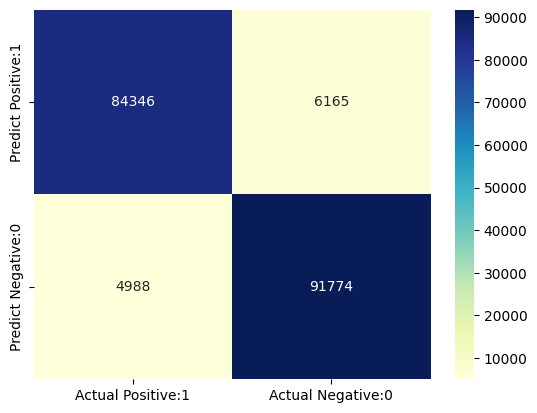

In [88]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##### **5.2 Classification Metrices**

In [86]:
print(metrics.classification_report(y_test, dt_pred_tfidf, digits=5, labels=[1,0]))

              precision    recall  f1-score   support

           1    0.93705   0.94845   0.94272     96762
           0    0.94416   0.93189   0.93799     90511

    accuracy                        0.94045    187273
   macro avg    0.94061   0.94017   0.94035    187273
weighted avg    0.94049   0.94045   0.94043    187273



#### **6. Prediksi Manual**

In [87]:
def prediksi(prediction):
    return 'Laki-Laki' if prediction == 1 else 'Perempuan'

nama = [
  'Novi Gustiana', 
  'Novia Kumala Sari', 
  'Novianto Rahmadi', 
  'Padli Nofrizal', 
  'Putri Wahyuni', 
  'Rahmat Hidayat', 
  'Rahmi Andreni', 
  'Rian Aries Fani', 
  'Riandi Selvi', 
  'Rianto', 
  'Ridha Ulva', 
  'Rizqi Wahyuningsih', 
  'Ruwadi Saputra', 
  'Sugeng Hermawan', 
  'Suliatun', 
  'Tomi Ismeidianto', 
  'Usthalay Putra', 
  'Winggo Aga Septian', 
  'Yunaldi Rizki Putra', 
  'Arif fasetyo', 
  'Arie Rahman Satria', 
  'Arinda Oktaviana', 
  'Melani', 
  'Malik', 
  'Melani Malik'
]
inputan = vectorizer_tfidf.transform(nama)

for i in range(len(nama)):
    prediction = clf.predict(inputan[i])[0]
    print(f"Nama: {nama[i]}, Prediksi: {prediksi(prediction)}")

Nama: Novi Gustiana, Prediksi: Perempuan
Nama: Novia Kumala Sari, Prediksi: Perempuan
Nama: Novianto Rahmadi, Prediksi: Laki-Laki
Nama: Padli Nofrizal, Prediksi: Laki-Laki
Nama: Putri Wahyuni, Prediksi: Perempuan
Nama: Rahmat Hidayat, Prediksi: Laki-Laki
Nama: Rahmi Andreni, Prediksi: Perempuan
Nama: Rian Aries Fani, Prediksi: Laki-Laki
Nama: Riandi Selvi, Prediksi: Laki-Laki
Nama: Rianto, Prediksi: Laki-Laki
Nama: Ridha Ulva, Prediksi: Perempuan
Nama: Rizqi Wahyuningsih, Prediksi: Perempuan
Nama: Ruwadi Saputra, Prediksi: Laki-Laki
Nama: Sugeng Hermawan, Prediksi: Laki-Laki
Nama: Suliatun, Prediksi: Perempuan
Nama: Tomi Ismeidianto, Prediksi: Laki-Laki
Nama: Usthalay Putra, Prediksi: Laki-Laki
Nama: Winggo Aga Septian, Prediksi: Laki-Laki
Nama: Yunaldi Rizki Putra, Prediksi: Laki-Laki
Nama: Arif fasetyo, Prediksi: Laki-Laki
Nama: Arie Rahman Satria, Prediksi: Laki-Laki
Nama: Arinda Oktaviana, Prediksi: Perempuan
Nama: Melani, Prediksi: Perempuan
Nama: Malik, Prediksi: Laki-Laki
Nama: 